notebook to plot boundary conditions from `NT_BC` and compare to Geant simulations

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
def plottable(X, Y):
    return (X[1:] + X[:-1])/2, Y[1:]

def plottable_spectrum(X, Y):
    return (X[1:] + X[:-1])/2, Y[1:]/abs(X[1:] - X[:-1])

In [20]:
ss_data_file = 'data/V1/phi_calcs.dat'
ss_dat = pd.read_csv(ss_data_file, sep = ' ', index_col = 0, names = ['Eg','phig'])

Eg_s = ss_dat.Eg.values
phig_s = ss_dat.phig.values
gs_s = ss_dat.index

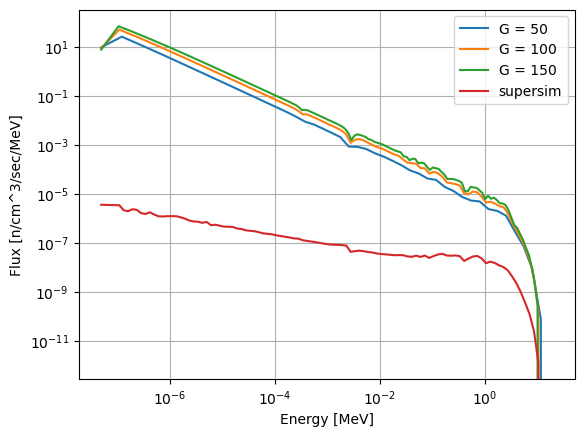

In [21]:
plt.figure()
plt.loglog()
plt.grid()
plt.xlabel('Energy [MeV]')
plt.ylabel('Flux [n/cm^3/sec/MeV]')

for G in [50, 100, 150]:
    data_file = f'data/V1/data_Norite_{G}_BC_V1.dat'
    dat = pd.read_csv(data_file, sep = ' ', index_col = 0, names = ['Eg','phig'])

    Eg = dat.Eg.values
    phig = dat.phig.values
    gs = dat.index

    plt.plot(*plottable_spectrum(Eg, phig), label = f'G = {G}')
plt.plot(*plottable_spectrum(Eg_s, phig_s), label = 'supersim')
#plt.plot(Eg[:-1], (1e-11)/Eg[:-1], label = '1/E')

plt.legend()

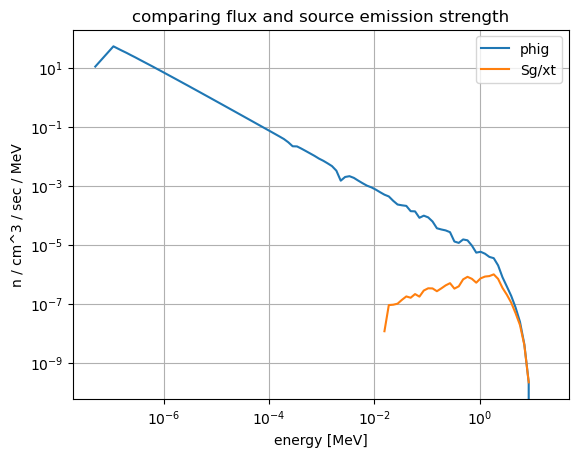

In [22]:
# compare flux and emission strength (group source/group total cross section)

XS = pd.read_csv('../cross_sections/data/V1/data_Norite_100_20_xs.dat', sep = ' ', index_col = 0, names = ['Eg', 'x_s', 'xt'])
Src = pd.read_csv('../sources/data/V1/data_Norite_100_Sg.dat', sep = ' ', index_col = 0, names = ['Eg','Sg'])
BC = pd.read_csv('../boundary_conditions/data/V1/data_Norite_100_BC_V1.dat', sep = ' ', index_col = 0, names = ['Eg','phig'])

Eg = BC.Eg.values
Es = (Eg[1:] + Eg[:-1])/2
dE = abs(Eg[1:] - Eg[:-1])

phig = BC.phig.values[:-1]/dE
Sg = Src.Sg.values[:-1]/dE
xt = XS.xt.values[:-1]
xs = XS.x_s.values[:-1]

p2 = Sg!=0

plt.figure()
plt.loglog()
plt.grid()
plt.xlabel('energy [MeV]')
plt.ylabel('n / cm^3 / sec / MeV')
plt.title('comparing flux and source emission strength')

plt.plot(Es, phig, label = 'phig')
plt.plot(Es[p2], Sg[p2]/xt[p2], label = 'Sg/xt')


plt.legend()

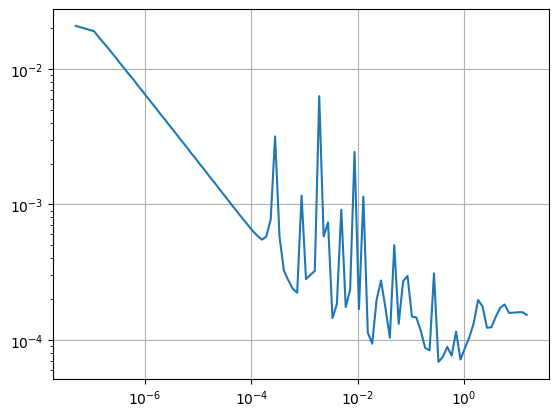

In [29]:
plt.figure()
plt.loglog()
plt.grid()
plt.plot(Es[xt>0], (xt-xs)[xt>0]/xt[xt>0])